# Random Forest Model

## Import Dependency

In [11]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

## Import CSV

In [7]:
df = pd.read_csv(os.path.join("../NBA_Data/nbaNewStatByID.csv"))
df = df.dropna()
df.head()

,Team,Year,GP,W,L,WIN%,MIN,PTS,FGM,FGA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,plus_minus
0,0,2014,82,38,44,0.463,3966,8282,3061,6688,...,2565,3278,2041,1251,680,326,354,1577,1643,-39
1,1,2014,82,25,57,0.305,3946,7892,2996,6883,...,2505,3485,1726,1261,584,343,373,1743,1564,-366
2,2,2014,82,44,38,0.537,3976,8079,2931,6391,...,2407,3128,1714,1191,705,311,337,1777,1704,-82
3,3,2014,82,43,39,0.524,3981,7942,2976,6730,...,2724,3500,1778,1010,499,421,415,1493,1716,-18
4,4,2014,82,48,34,0.585,3986,7680,2843,6577,...,2683,3620,1860,1223,594,424,490,1565,1714,152


## Create a Train Test Split

In [8]:
target = df["Team"]
target_names = ["Atlanta Hawks", "Boston Celtics","Brooklyn Nets","Charlotte Bobcats","Chicago Bulls",
               "Cleveland Cavaliers","Dallas Mavericks","Denver Nuggets","Detroit Pistons","Golden State Warriors",
                "Houston Rockets","Indiana Pacers","Los Angeles Clippers","Los Angeles Lakers","Memphis Grizzlies",
                "Miami Heat","Milwaukee Bucks","Minnesota Timberwolves","New Orleans Pelicans","New York Knicks",
                "Oklahoma City Thunder","Orlando Magic","Philadelphia 76ers","Phoenix Suns","Portland Trail Blazers",
                "Sacramento Kings","San Antonio Spurs","Toronto Raptors","Utah Jazz","Washington Wizards"
               ]

In [9]:
data = df.drop(["Team","Year","GP"], axis=1)
feature_names = data.columns
data.head()

,W,L,WIN%,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,DREB,REB,AST,TOV,STL,BLK,BLKA,PF,PFD,plus_minus
0,38,44,0.463,3966,8282,3061,6688,45.8,768,2116,...,2565,3278,2041,1251,680,326,354,1577,1643,-39
1,25,57,0.305,3946,7892,2996,6883,43.5,575,1729,...,2505,3485,1726,1261,584,343,373,1743,1564,-366
2,44,38,0.537,3976,8079,2931,6391,45.9,709,1922,...,2407,3128,1714,1191,705,311,337,1777,1704,-82
3,43,39,0.524,3981,7942,2976,6730,44.2,516,1471,...,2724,3500,1778,1010,499,421,415,1493,1716,-18
4,48,34,0.585,3986,7680,2843,6577,43.2,508,1459,...,2683,3620,1860,1223,594,424,490,1565,1714,152


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

## Train the Model - Random Forest

In [12]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.23684210526315788

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.39473684210526316

In [14]:
sorted(zip(rf.feature_importances_, feature_names), reverse=True)

[(0.05922596520935305, 'TOV'),
 (0.05540541307351457, 'AST'),
 (0.05384812011418169, 'PF'),
 (0.05123843129043566, 'BLK'),
 (0.04818122318817292, 'FTA'),
 (0.04503377319572431, 'REB'),
 (0.04356535526962459, 'OREB'),
 (0.043177093822368236, 'BLKA'),
 (0.04205302384389755, '3PA'),
 (0.041282441591011916, 'plus_minus'),
 (0.04120573613384698, 'FT%'),
 (0.04103432098884996, 'STL'),
 (0.040848528250789475, 'FTM'),
 (0.040831548085071376, 'PFD'),
 (0.037755366052386594, '3PM'),
 (0.037259747981961584, 'FGA'),
 (0.035830393522736745, 'FGM'),
 (0.035631461384945155, 'DREB'),
 (0.034060521237101474, '3P%'),
 (0.03258656637233369, 'FG%'),
 (0.030948621344892256, 'WIN%'),
 (0.030871453632009247, 'W'),
 (0.030777534548426924, 'L'),
 (0.026410507274238465, 'PTS'),
 (0.020936852592125386, 'MIN')]

## Hyperparameter Tuning

In [15]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {"n_estimators":[200,500,1000]}
 
grid = GridSearchCV(rf,param_grid, verbose=3)

In [16]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] n_estimators=200 ................................................


/Users/stella/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=200, score=0.304, total=   0.3s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.435, total=   0.2s
[CV] n_estimators=200 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .................... n_estimators=200, score=0.318, total=   0.2s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.455, total=   0.2s
[CV] n_estimators=200 ................................................
[CV] .................... n_estimators=200, score=0.227, total=   0.2s
[CV] n_estimators=500 ................................................
[CV] .................... n_estimators=500, score=0.304, total=   0.7s
[CV] n_estimators=500 ................................................
[CV] .................... n_estimators=500, score=0.391, total=   0.6s
[CV] n_estimators=500 ................................................
[CV] .................... n_estimators=500, score=0.227, total=   0.6s
[CV] n_estimators=500 ................................................
[CV] .................... n_estimators=500, score=0.409, total=   0.6s
[CV] n_estimators=500 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    9.9s finished


GridSearchCV(estimator=RandomForestClassifier(n_estimators=200),
             param_grid={'n_estimators': [200, 500, 1000]}, verbose=3)

In [17]:
print(grid.best_params_)
print(grid.best_score_)

{'n_estimators': 500}
0.36640316205533596


## RF plot - Bar

In [18]:
features = feature_names
importances = clf.feature_importances_
indices = np.argsort(importances)

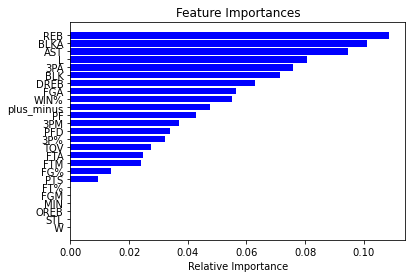

In [19]:
fig = plt.figure()
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [20]:
# Save figure
fig.savefig("../NBA_Model_Img/04_RandomForest_bar_team.png", dpi=100)

## RF plot - Tree

In [21]:
fn =feature_names
cn=target_names

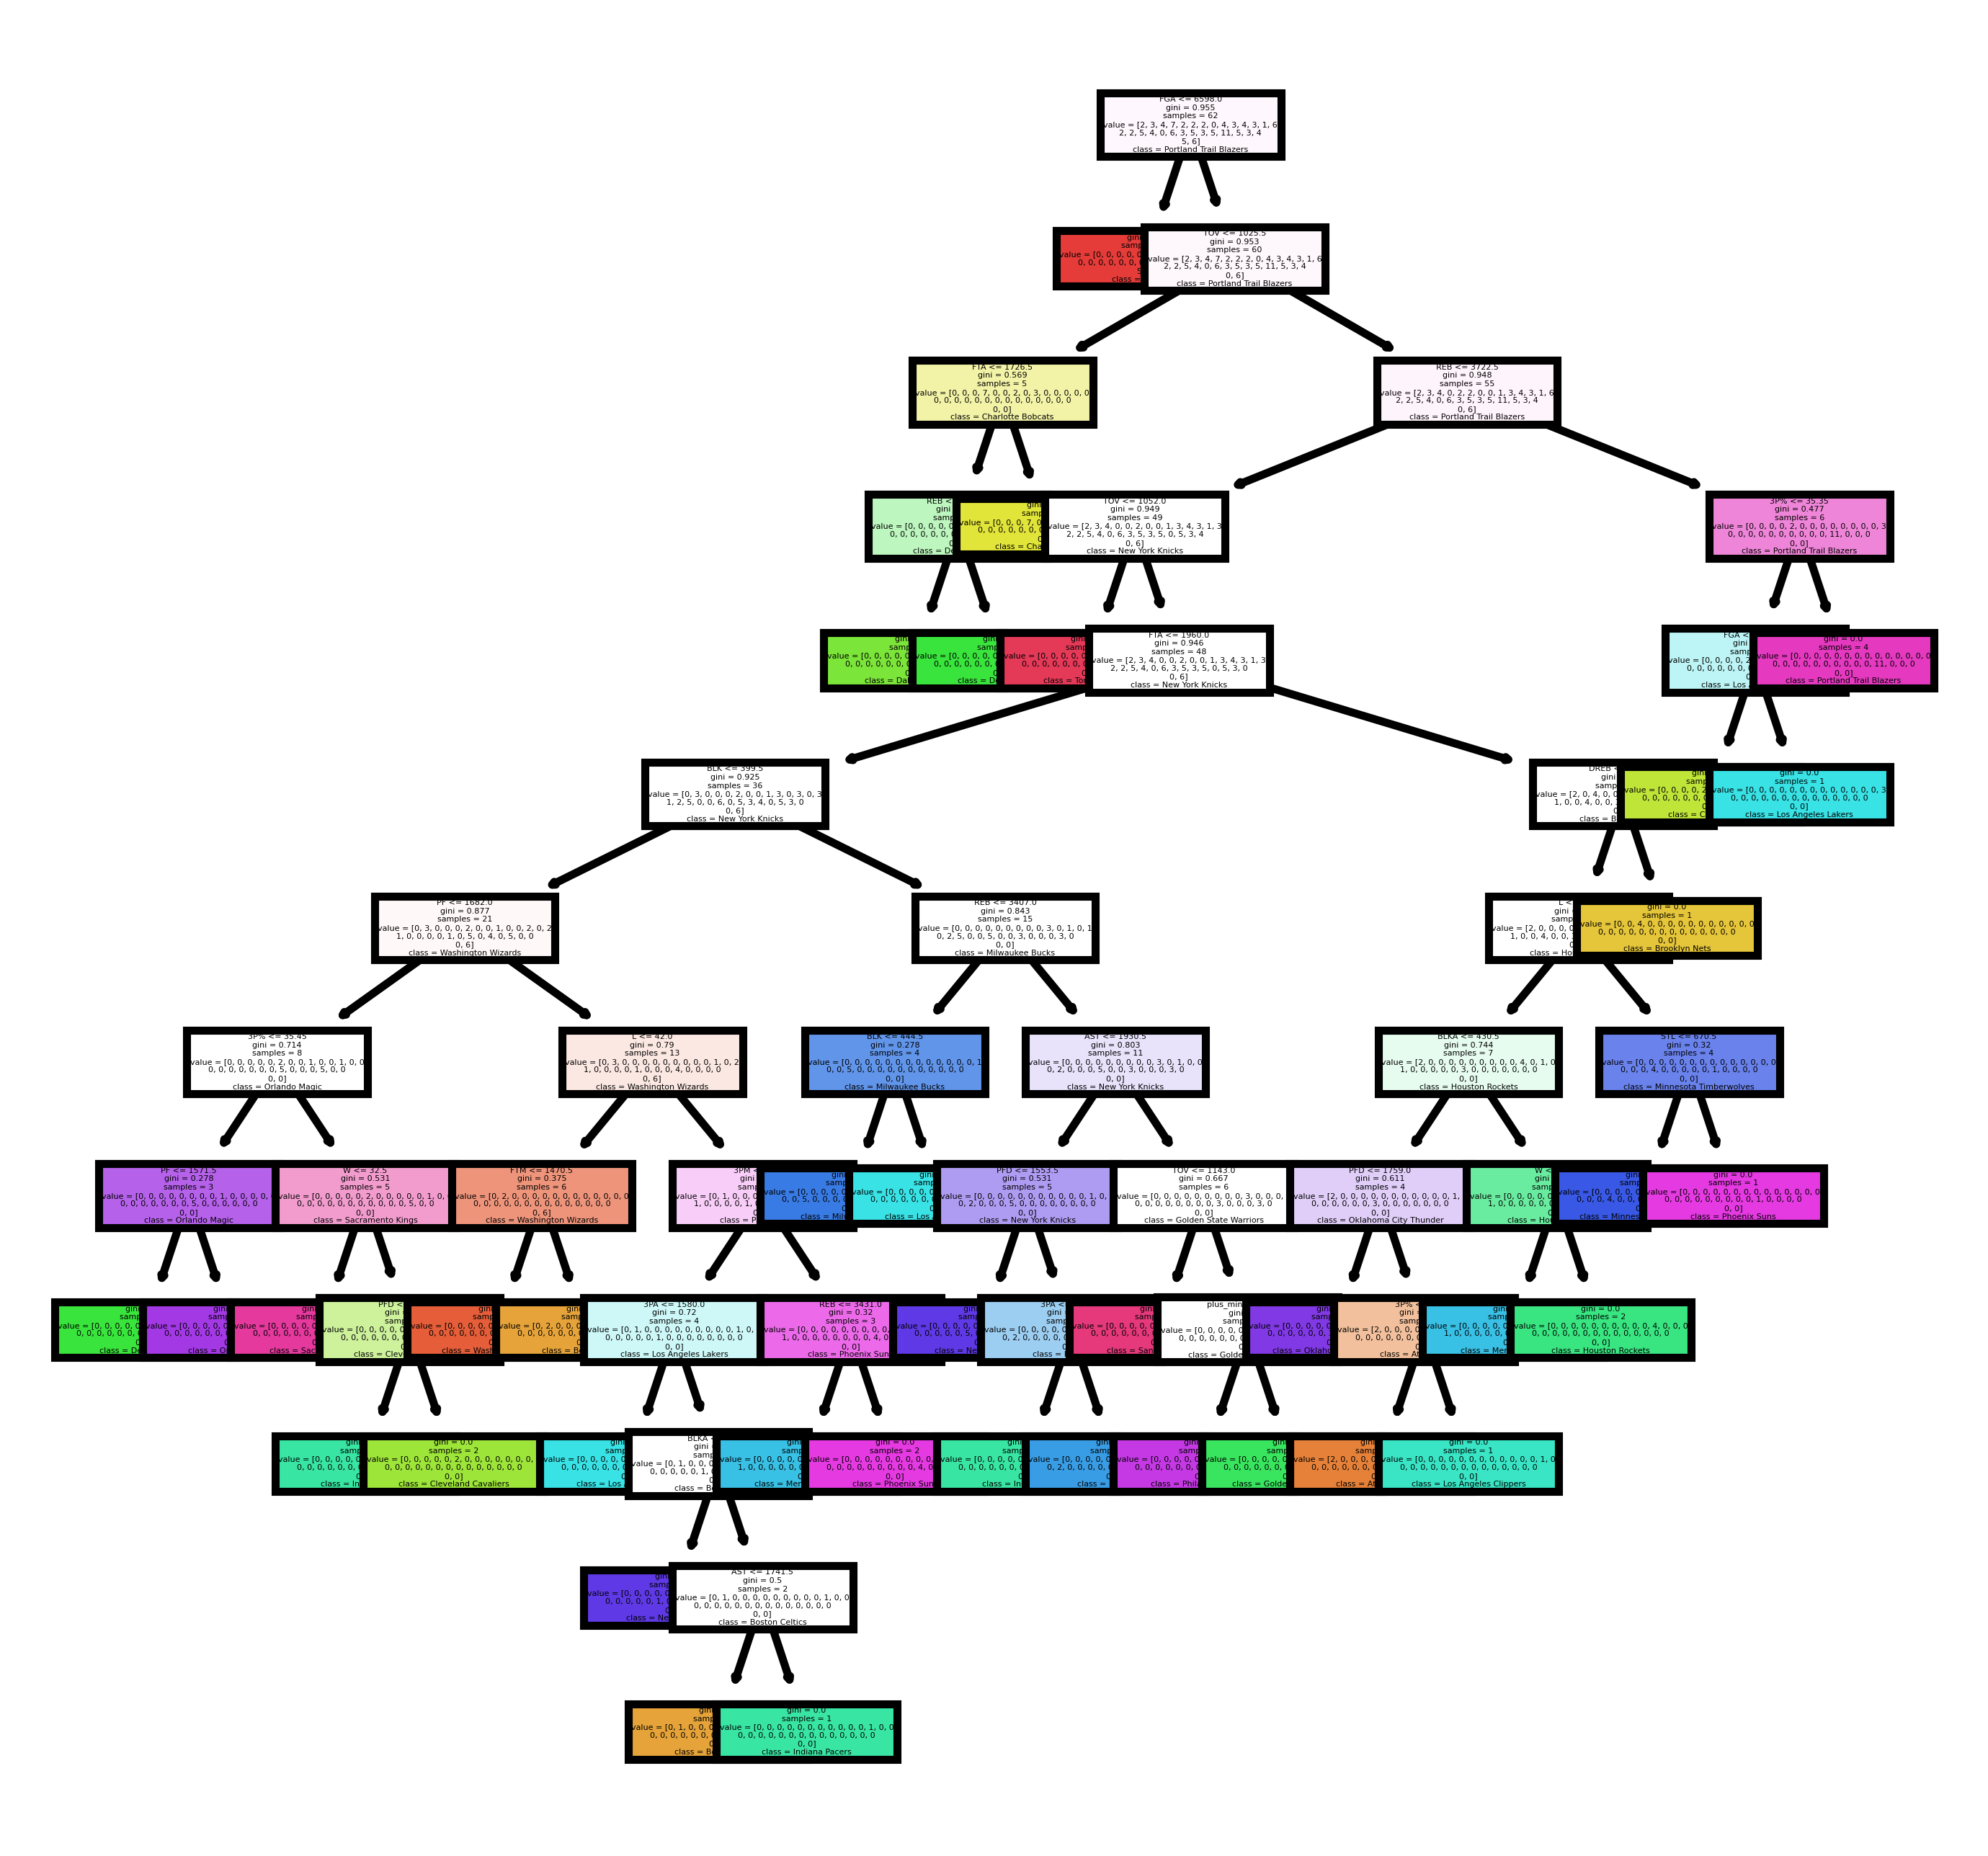

In [22]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [24]:
# Save figure
fig.savefig('../NBA_Model_Img/05_RandomForest_tree_team.png')